### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [8]:
#importing packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Read the dataset
vehicles_df = pd.read_csv("vehicle.csv")
vehicles_df = vehicles_df.dropna()

### 2. Print/ Plot the dependent (categorical variable) - Class column

###Since the variable is categorical, you can use value_counts function

In [6]:
vehicles_df["class"].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [7]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [12]:
vehicles_scaleint = vehicles_df.drop(["class"],axis =1)

In [13]:
vehicles_scaleint.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [14]:
df_scaled = vehicles_scaleint.apply(zscore)

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [15]:
cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [23]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=3)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_vehicles = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_vehicles[0:10]

,num_clusters,cluster_errors
0,1,14634.000000
1,2,8623.136976
2,3,7037.467395
3,4,5739.201327
4,5,5185.719333
5,6,4706.433256
6,7,4350.686420
7,8,4084.704031
8,9,3846.676599


### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

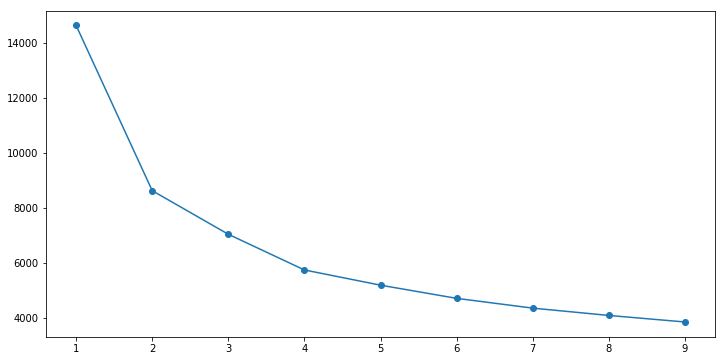

In [24]:
plt.figure(figsize=(12,6))
plt.plot( clusters_vehicles.num_clusters, clusters_vehicles.cluster_errors, marker = "o" )

In [46]:
errors = clusters_vehicles['cluster_errors']
for i in range(8):
    print(errors[i+1]-errors[i])

-6010.863024013561
-1585.6695813683682
-1298.2660677015629
-553.4819943636749
-479.2860765189607
-355.7468360894527
-265.9823888039723
-238.02743242508996


### Find out the optimal value of K

In [0]:
#K optimal value is 4

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [38]:
kmeans = KMeans(n_clusters=4, n_init = 15, random_state=3)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=15, n_jobs=None, precompute_distances='auto',
    random_state=3, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [39]:
centroids = kmeans.cluster_centers_

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [40]:
vehicles_centroids = pd.DataFrame(centroids,columns = list(df_scaled))

In [41]:
vehicles_centroids

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,1.154428,1.184286,1.211987,0.973322,0.094921,0.218659,1.297968,-1.214247,1.301845,1.098306,1.205903,1.308987,1.091213,-0.107879,0.168326,0.267955,0.004670,0.190327
1,-0.228397,-0.577113,-0.308062,-0.041242,0.178445,-0.173699,-0.456880,0.321991,-0.485592,-0.539969,-0.421529,-0.461481,-0.605499,-0.642849,-0.062341,0.012963,0.822192,0.705383
2,-0.915758,-0.522403,-0.889506,-1.087728,-0.561971,-0.300016,-0.779779,0.867364,-0.745939,-0.485536,-0.801746,-0.783837,-0.390575,0.783159,-0.090239,-0.296090,-1.047745,-1.103612
3,-0.733024,0.072735,-0.272171,2.947683,6.836652,8.696706,-0.535008,0.466248,-0.557406,0.283411,1.697528,-0.588068,0.212701,4.965638,-0.274839,-0.231193,-0.707994,-0.453651


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [42]:
vehicles_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

vehicles_labels['labels'] = vehicles_labels['labels'].astype('category')

In [43]:
vehicles_labeld = df_scaled.join(vehicles_labels)

In [51]:
# get the number of labels created
vehicles_labeld['labels'].value_counts()

1    294
0    247
2    231
3      8
Name: labels, dtype: int64

In [44]:
print(vehicles_labeld.head(5))

   compactness  circularity  distance_circularity  radius_ratio  \
0     0.163231     0.520408              0.060669      0.264970   
1    -0.322874    -0.619123              0.124067     -0.836393   
2     1.256966     0.845988              1.518823      1.187734   
3    -0.079822    -0.619123             -0.002729     -0.300595   
4    -1.052030    -0.130753             -0.763506      1.068668   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.283254                 0.299721      -0.198517   
1             -0.599253                 0.085785      -0.591720   
2              0.530251                 0.299721       1.162569   
3              0.153750                 0.085785      -0.742952   
4              5.173770                 9.285029      -0.591720   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.129648               -0.217151                   0.766312   
1       0.514333               -0.606014            

In [49]:
#Creating clusters just to group by and take a look at the data
vehicles_clusters = vehicles_labeld.groupby(['labels'])
clusters0=vehicles_clusters.get_group(0)
clusters1=vehicles_clusters.get_group(1)
clusters2=vehicles_clusters.get_group(2)
clusters3 = vehicles_clusters.get_group(3)
print(clusters3.head(5))

     compactness  circularity  distance_circularity  radius_ratio  \
4      -1.052030    -0.130753             -0.763506      1.068668   
33      0.892387     0.520408              1.582222      1.574700   
92      1.256966     1.171568              1.138435      0.651936   
125    -0.444400     0.194828             -0.129525     -0.776860   
268    -0.930504    -0.944703             -1.397486     -0.866160   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
4                5.173770                 9.285029      -0.591720   
33               0.781252                 0.299721       1.192815   
92              -0.348252                 0.085785       0.860105   
125              0.028249                 0.513657      -0.289256   
268             -0.222752                -0.342087      -1.499111   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
4         0.514333               -0.606014                  -0.268476   
33       -1.152637      

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [55]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [60]:
A = pd.DataFrame(a)
B = pd.DataFrame(b)
C= pd.DataFrame(c)

In [85]:
HC_df= pd.concat([A,B,C])
print(HC_df.head(5))
print(HC_df.shape)

           0         1
0  13.882785  4.438501
1  11.687256  1.250981
2  10.316397  1.449346
3   9.837412 -2.041974
4   8.691601 -4.289773
(250, 2)


### 10. Use scatter matrix to print all the 3 distributions

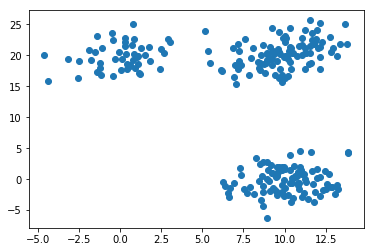

In [86]:
plt.scatter(x=HC_df[0],y=HC_df[1])

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [87]:
HC_df_model=linkage(Vehicles_HC,metric='euclidean',method='ward')

### 12. Plot the dendrogram for the consolidated dataframe

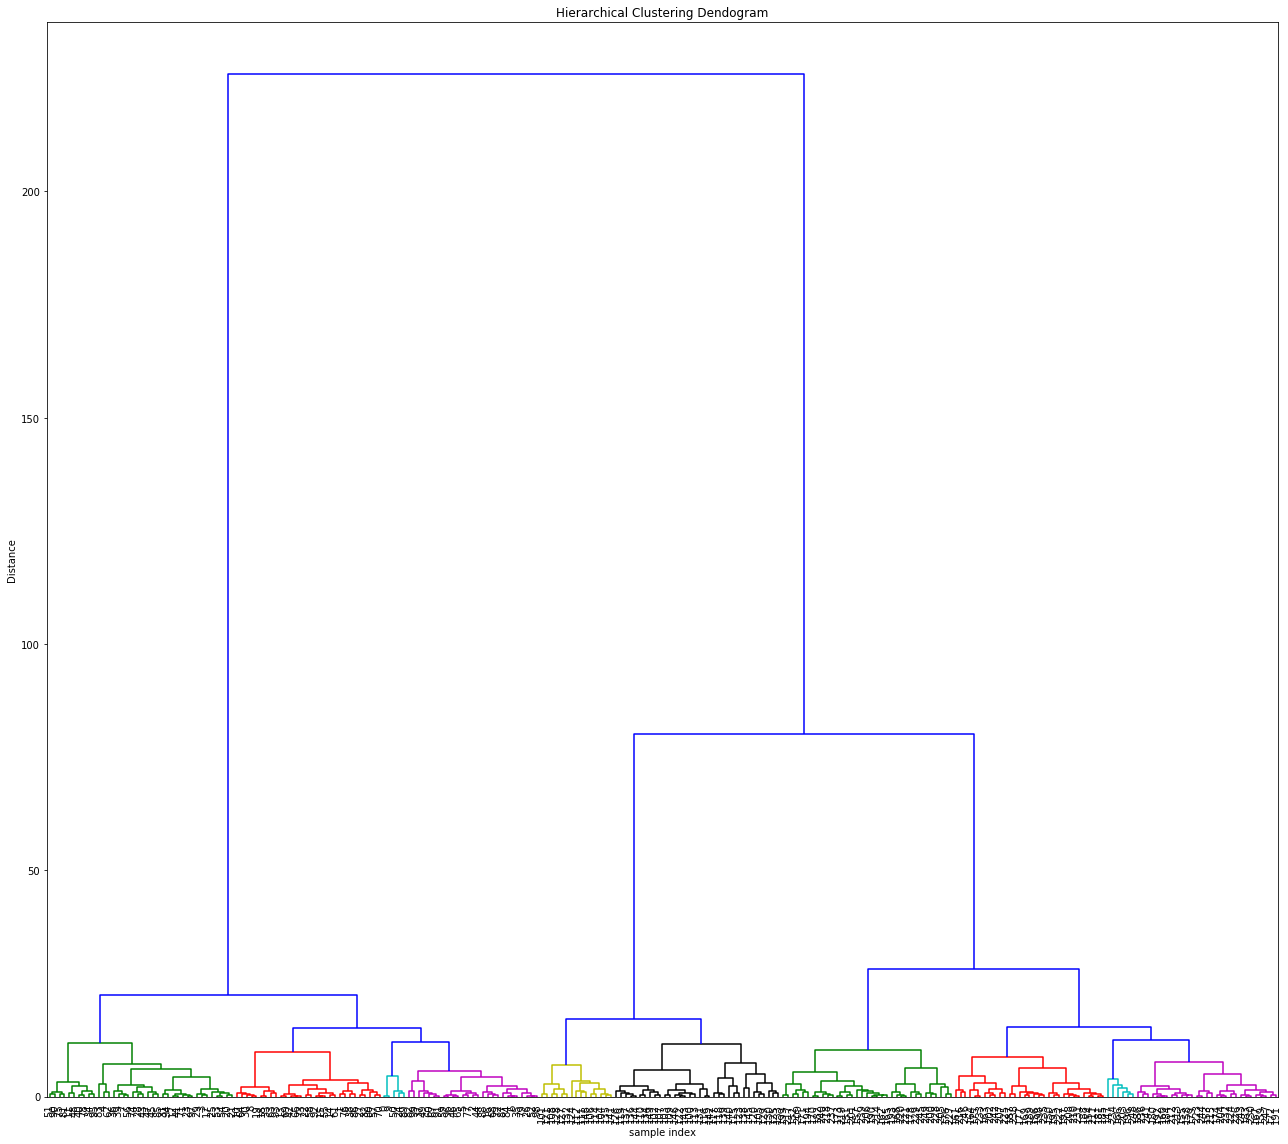

In [88]:
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(HC_df_model,leaf_rotation=90.0,p=25,color_threshold=12,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

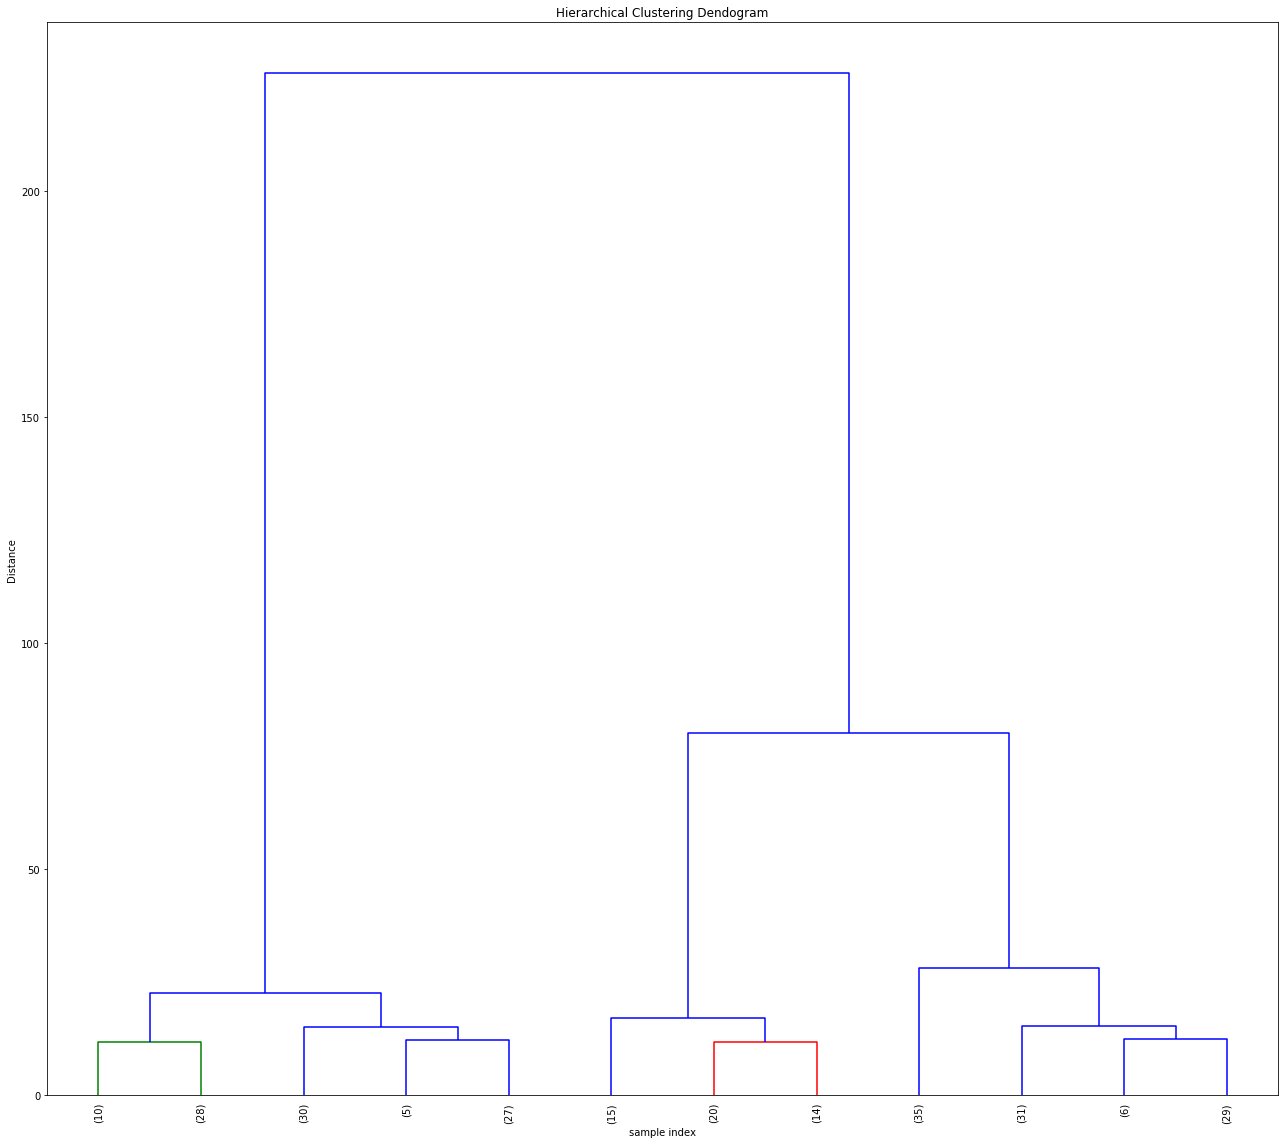

In [89]:
plt.figure(figsize=(18, 16))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(HC_df_model,leaf_rotation=90.0,p=12,color_threshold=12,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [90]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(HC_df_model, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

### Use matplotlib to visually observe the clusters in 2D space 

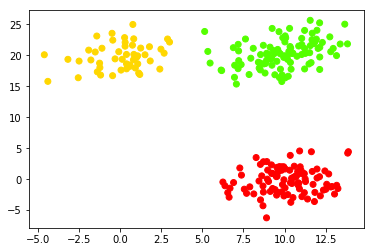

In [97]:
plt.scatter(HC_df[0],HC_df[1],c=clusters,cmap='prism')